In [1]:
# 💤 Sleep Quality Prediction - Simple ML Project
# -------------------------------------------------
# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [2]:
# -------------------------------------------------
# 2️⃣ Create Synthetic Dataset
np.random.seed(42)
n = 2000

age = np.random.randint(18, 70, n)
gender = np.random.choice(['Male', 'Female'], n)
screen_time = np.round(np.random.uniform(0.5, 6, n), 2)
exercise = np.random.randint(0, 120, n)
stress = np.round(np.random.uniform(1, 10, n), 2)
caffeine = np.random.choice([0, 50, 100, 150, 200, 250], n)
noise = np.random.randint(20, 60, n)
sleep_hours = np.clip(8 - (screen_time * 0.2) - (stress * 0.1) + (exercise / 100) - (caffeine / 500), 3, 10)

sleep_quality = np.where(sleep_hours >= 7.5, 'Good',
                         np.where(sleep_hours >= 6, 'Moderate', 'Poor'))

df = pd.DataFrame({
    'Age': age,
    'Gender': gender,
    'ScreenTime': screen_time,
    'Exercise': exercise,
    'Stress': stress,
    'Caffeine': caffeine,
    'Noise': noise,
    'SleepHours': sleep_hours,
    'SleepQuality': sleep_quality
})

# -------------------------------------------------
# 3️⃣ Save Dataset
df.to_csv('sleep_quality.csv', index=False)
print("✅ CSV file saved as 'sleep_quality.csv'")



✅ CSV file saved as 'sleep_quality.csv'


In [3]:
# -------------------------------------------------
# 4️⃣ Data Understanding
print("\n--- DATA INFO ---")
print(df.info())



--- DATA INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2000 non-null   int32  
 1   Gender        2000 non-null   object 
 2   ScreenTime    2000 non-null   float64
 3   Exercise      2000 non-null   int32  
 4   Stress        2000 non-null   float64
 5   Caffeine      2000 non-null   int64  
 6   Noise         2000 non-null   int32  
 7   SleepHours    2000 non-null   float64
 8   SleepQuality  2000 non-null   object 
dtypes: float64(3), int32(3), int64(1), object(2)
memory usage: 117.3+ KB
None


In [4]:
print("\n--- FIRST 5 ROWS ---")
print(df.head())



--- FIRST 5 ROWS ---
   Age  Gender  ScreenTime  Exercise  Stress  Caffeine  Noise  SleepHours  \
0   56    Male        4.12       104    9.34       100     33       7.082   
1   69  Female        1.89        86    9.66       150     53       7.216   
2   46  Female        1.71        44    5.58       250     53       7.040   
3   32    Male        3.19        22    5.08       200     44       6.674   
4   60  Female        4.56       113    3.51       250     23       7.367   

  SleepQuality  
0     Moderate  
1     Moderate  
2     Moderate  
3     Moderate  
4     Moderate  


In [5]:
print("\n--- DESCRIPTIVE STATS ---")
print(df.describe())


--- DESCRIPTIVE STATS ---
               Age   ScreenTime    Exercise       Stress     Caffeine  \
count  2000.000000  2000.000000  2000.00000  2000.000000  2000.000000   
mean     43.805500     3.294170    59.38600     5.465280   123.375000   
std      14.929203     1.581749    34.39841     2.608718    84.429992   
min      18.000000     0.500000     0.00000     1.000000     0.000000   
25%      31.000000     1.937500    29.00000     3.197500    50.000000   
50%      44.000000     3.350000    59.00000     5.420000   100.000000   
75%      56.000000     4.680000    89.00000     7.782500   200.000000   
max      69.000000     6.000000   119.00000    10.000000   250.000000   

             Noise   SleepHours  
count  2000.000000  2000.000000  
mean     39.515500     7.141748  
std      11.434515     0.566180  
min      20.000000     5.535000  
25%      30.000000     6.741500  
50%      39.000000     7.139000  
75%      49.000000     7.545000  
max      59.000000     8.796000  


In [6]:
print("\n--- NULL VALUES ---")
print(df.isnull().sum())



--- NULL VALUES ---
Age             0
Gender          0
ScreenTime      0
Exercise        0
Stress          0
Caffeine        0
Noise           0
SleepHours      0
SleepQuality    0
dtype: int64


In [7]:
print("\n--- VALUE COUNTS ---")
print(df['SleepQuality'].value_counts())


--- VALUE COUNTS ---
SleepQuality
Moderate    1409
Good         552
Poor          39
Name: count, dtype: int64


In [8]:

# -------------------------------------------------
# 5️⃣ Data Visualization (EDA)
sns.set(style='whitegrid', palette='viridis')



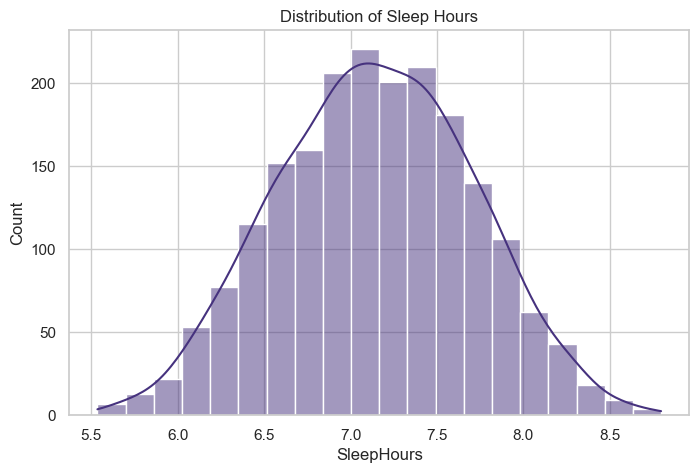

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['SleepHours'], kde=True, bins=20)
plt.title("Distribution of Sleep Hours")
plt.savefig('plot_sleep_hours.png')
plt.show()



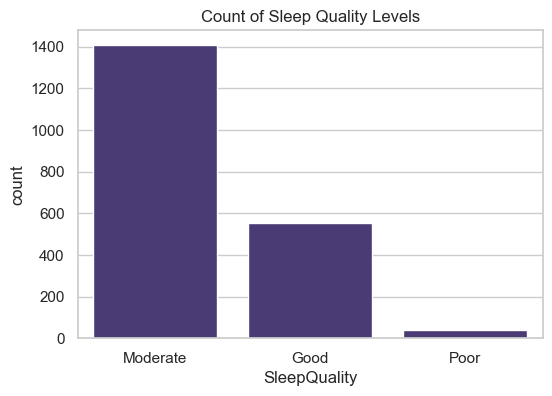

In [10]:

plt.figure(figsize=(6,4))
sns.countplot(x='SleepQuality', data=df)
plt.title("Count of Sleep Quality Levels")
plt.savefig('plot_sleep_quality_count.png')
plt.show()



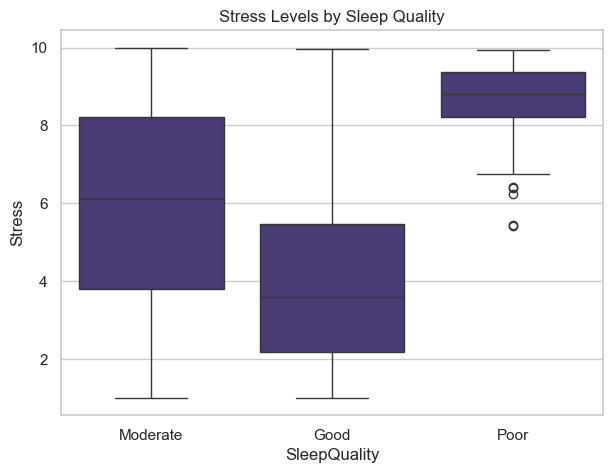

In [11]:
plt.figure(figsize=(7,5))
sns.boxplot(x='SleepQuality', y='Stress', data=df)
plt.title("Stress Levels by Sleep Quality")
plt.savefig('plot_stress_sleepquality.png')
plt.show()



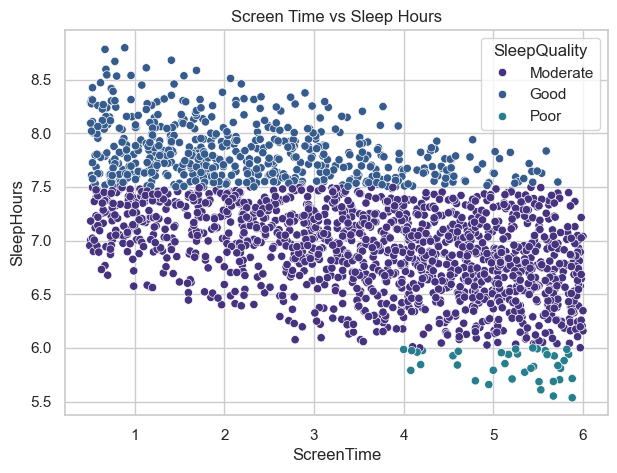

In [12]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='ScreenTime', y='SleepHours', hue='SleepQuality', data=df)
plt.title("Screen Time vs Sleep Hours")
plt.savefig('plot_screen_sleep.png')
plt.show()



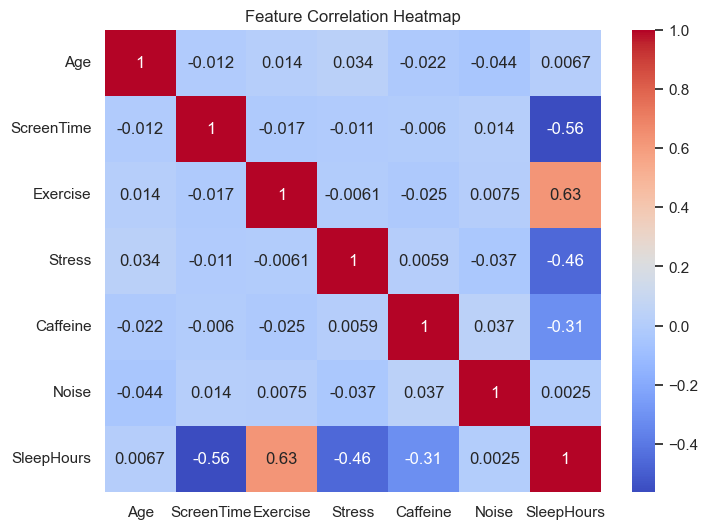

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.savefig('plot_heatmap.png')
plt.show()

In [14]:

# -------------------------------------------------
# 6️⃣ Feature Engineering
df['CaffeineCategory'] = pd.cut(df['Caffeine'], bins=[-1,50,150,300],
                                labels=['Low','Medium','High'])
df['StressLevel'] = pd.cut(df['Stress'], bins=[0,4,7,10],
                           labels=['Low','Moderate','High'])
df['Active'] = np.where(df['Exercise']>60,1,0)
df['NoiseLevel'] = np.where(df['Noise']>40,'High','Low')

print("\n--- FEATURE ENGINEERING DONE ---")
print(df[['Caffeine','CaffeineCategory','Stress','StressLevel','Exercise','Active','Noise','NoiseLevel']].head())



--- FEATURE ENGINEERING DONE ---
   Caffeine CaffeineCategory  Stress StressLevel  Exercise  Active  Noise  \
0       100           Medium    9.34        High       104       1     33   
1       150           Medium    9.66        High        86       1     53   
2       250             High    5.58    Moderate        44       0     53   
3       200             High    5.08    Moderate        22       0     44   
4       250             High    3.51         Low       113       1     23   

  NoiseLevel  
0        Low  
1       High  
2       High  
3       High  
4        Low  


In [15]:

# Encode categorical variables
df_encoded = df.copy()
label_enc = LabelEncoder()
df_encoded['Gender'] = label_enc.fit_transform(df_encoded['Gender'])
df_encoded['CaffeineCategory'] = label_enc.fit_transform(df_encoded['CaffeineCategory'])
df_encoded['StressLevel'] = label_enc.fit_transform(df_encoded['StressLevel'])
df_encoded['NoiseLevel'] = label_enc.fit_transform(df_encoded['NoiseLevel'])
df_encoded['SleepQuality'] = label_enc.fit_transform(df_encoded['SleepQuality'])


In [16]:

# -------------------------------------------------
# 7️⃣ Train-Test Split
X = df_encoded.drop('SleepQuality', axis=1)
y = df_encoded['SleepQuality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [17]:

# -------------------------------------------------
# 8️⃣ Model Training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=500)
lr.fit(X_train_scaled, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [18]:

# -------------------------------------------------
# 9️⃣ Model Evaluation
print("\n--- Logistic Regression ---")
y_pred_lr = lr.predict(X_test_scaled)
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", round(accuracy_score(y_test, y_pred_lr),3))



--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       110
           1       0.97      1.00      0.98       282
           2       1.00      0.50      0.67         8

    accuracy                           0.98       400
   macro avg       0.99      0.82      0.88       400
weighted avg       0.98      0.98      0.98       400

Accuracy: 0.978


In [19]:

print("\n--- Random Forest ---")
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf),3))



--- Random Forest ---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       110
           1       1.00      1.00      1.00       282
           2       1.00      0.88      0.93         8

    accuracy                           0.99       400
   macro avg       1.00      0.96      0.98       400
weighted avg       1.00      0.99      0.99       400

Accuracy: 0.995


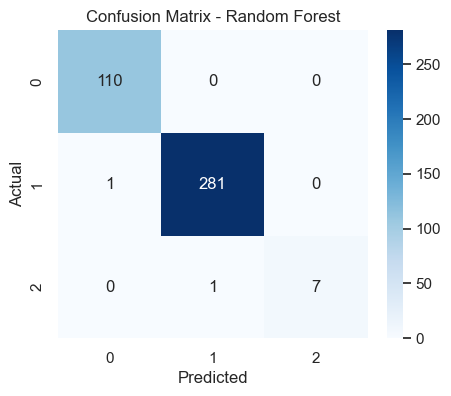

In [20]:

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [21]:

# -------------------------------------------------
# 🔟 Predict on New Data
new_data = pd.DataFrame({
    'Age': [25],
    'Gender': [1],  # 1 for Male (encoded)
    'ScreenTime': [4.5],
    'Exercise': [30],
    'Stress': [8.2],
    'Caffeine': [150],
    'Noise': [50],
    'SleepHours': [5.6],
    'CaffeineCategory': [1],
    'StressLevel': [2],
    'Active': [0],
    'NoiseLevel': [1]
})

# Match features
new_scaled = scaler.transform(new_data)
pred = rf.predict(new_data)
pred_label = label_enc.inverse_transform(pred)
print("\n🧠 Prediction for new data:", pred_label[0])




🧠 Prediction for new data: Poor


In [22]:

# -------------------------------------------------
# 1️⃣1️⃣ Save Models
joblib.dump(lr, 'sleep_lr_model.pkl')
joblib.dump(rf, 'sleep_rf_model.pkl')
joblib.dump(scaler, 'sleep_scaler.pkl')

print("\n✅ Models saved: sleep_lr_model.pkl, sleep_rf_model.pkl, sleep_scaler.pkl")



✅ Models saved: sleep_lr_model.pkl, sleep_rf_model.pkl, sleep_scaler.pkl
